<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

# Clustering  
  
So far, we have addressed situations of **supervised machine learning**. This is where we have many labelled training examples with features and with outcomes. The core task in supervised machine learning is often prediction: what is the relationship between the inpit features and the outcome that we observe.  
However, there are many applications where we actually do not know the outcome or do not have clear "labels". We are trying to find patterns that might inform downstream analysis. This is known as **unsupervised machine learning**. 

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

*Clustering* is arguably the most important example of unsupervised machine learning. It is the task of collecting data points into groups depending on some underlying pattern.  
There are many different clustering algorithms and in this notebook, we will just cover a few of the important ones.  
As we have done in the previous notebooks, we will use the prostate cancer dataset that we've been working on so far.  

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## 1) Load in the prostate cancer dataset  

As in previous tasks, the first thing we need to do is read in the prostate cancer dataset that we've been dealing with. We are going to use pandas and numpy to do this  
  
We will also read in our biomarker panel that we found in the previous homework. We will compare clustering with all 1000 genes to with just the biomarker panel. 

In [38]:
import pandas as pd 
import numpy as np

In [39]:
df = pd.read_csv("dataset/pca_dataset_scaled.csv")

# this line takes all the columns from df *except* SAMPLE_ID and DESNT_STATUS. This is so we can just look at the list of genes
gene_names = [col for col in df.columns if col not in ["SAMPLE_ID", "DESNT_Status"]]

In [40]:
import json 

with open("dataset/biomarker_panel.json", "r") as file: 
    panel = json.load(file)

In [41]:
panel

['NRG1-IT2',
 'CPA6',
 'GJB5',
 'SLC52A1',
 'GALNT5',
 'FAM196B',
 'DUOXA1',
 'GJB4',
 'WNT3A',
 'MIR31HG',
 'MUC4',
 'CDH22',
 'PIK3C2G',
 'ALDH3A1',
 'KRT13',
 'C15orf6',
 'FGFBP1',
 'CYP3A5',
 'DUOXA2',
 'SLC5A8',
 'NRG2',
 'PCDH8',
 'FAM83B',
 'OLFM4',
 'RNASE7',
 'AOC1',
 'DSG3',
 'THSD3',
 'CXCR2',
 'CLCA4']

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## <u> K-Means Clustering </u>. 
  
This is the most basic clustering algorithm 

### What Is K-Means Clustering?

K-means clustering groups your data into a number of clusters (you decide how many — this is the “K” in K-means). Each cluster contains data points that are similar to each other and different from those in other clusters.

Think of it like organizing patients into groups based on similar lab results or vital signs — without knowing anything about their diagnosis ahead of time.

---

### How the Algorithm Works (Overview)

1. **Choose the number of clusters (K)** — for example, 3.
2. **Randomly place K points** (called "centroids") in the data space.
3. **Assign each data point** to the nearest centroid — this forms K groups.
4. **Move each centroid** to the center of its assigned group.
5. **Repeat steps 3 and 4** until the centroids stop moving significantly.

This is an **iterative process** that refines the clusters until they are as tight and well-separated as possible.

---

### When to Use K-Means

K-means is useful when:

- You want to **discover hidden patterns** in data (e.g., patient subgroups).
- You don't have labels or categories (unsupervised learning).
- You have **numerical data** (e.g., lab values, measurements).
- You want to **segment populations** for further analysis.

**Examples:**

- Grouping patients based on clinical markers to identify phenotypes.
- Clustering hospitals based on resource usage patterns.
- Segmenting wearable device data into behavioral patterns.

---

### When Not to Use K-Means

K-means may not work well when:

- Your data is **not numeric** (e.g., text, categories without numbers).
- Clusters are **not spherical** or are very different in size.
- There are **outliers** that can distort the centroids.
- You don't know how many clusters (K) you need.
- Your data is **highly imbalanced** or has a lot of noise.

In these cases, other clustering methods like **DBSCAN** or **hierarchical clustering** might be more appropriate.

---

### Tip:
K-means doesn’t tell you what the clusters *mean* — you still need to interpret them using clinical insight. It just tells you where groups seem to form based on the data.


In [42]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_kmeans = df.copy()

# Step 1: Select the feature columns (assumed to be numeric)
X = df_kmeans[gene_names]

# Step 2: Create and fit the KMeans model
# Let's try clustering into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Step 4: Add the cluster labels back to the dataframe
df_kmeans['cluster'] = kmeans.labels_

In [43]:
df_kmeans[["cluster"]]

,cluster
0,2
1,1
2,1
3,1
4,1
...,...
651,2
652,1
653,1
654,1


In [44]:
# How many samples are in each cluster?
df_kmeans[["cluster"]].value_counts()

cluster
1          338
2          233
0           85
Name: count, dtype: int64

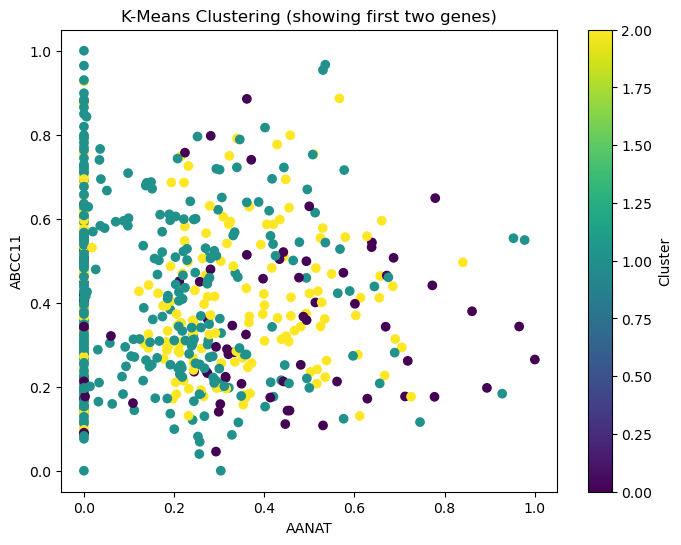

In [45]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=df_kmeans['cluster'], cmap='viridis')
plt.xlabel(gene_names[0])
plt.ylabel(gene_names[1])
plt.title("K-Means Clustering (showing first two genes)")
plt.colorbar(scatter, label='Cluster')
plt.show()

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

With all 1000 genes, it's very difficult to understand what is going on! Reducing to a smaller set is really important: this is a task known as **dimensionality reduction**  


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Dimensionality Reduction in Biology

Biological datasets — especially genomic or transcriptomic data — often involve **hundreds to thousands of features** (e.g., gene expression levels). This creates a **high-dimensional space**, which can be difficult to visualize, interpret, or use effectively in machine learning.

### Why High-Dimensional Data Is Challenging

- **Not human-interpretable**: We can't visualize data in more than 3 dimensions.
- **Many genes are correlated**, and not all contribute meaningfully to the biological differences we're interested in.
- **Noise increases with dimensionality**, making it harder to detect true patterns.
- Algorithms like clustering may struggle with sparse, high-dimensional data (this is known as the "curse of dimensionality").

### What Is Dimensionality Reduction?

Dimensionality reduction techniques aim to **capture the essential structure of high-dimensional data in fewer dimensions** — often 2 or 3 — while preserving important relationships.

This allows us to:
- Visualize patterns like clusters or gradients.
- Identify subgroups of patients or samples.
- Explore how samples relate to one another in a biologically meaningful way.

---

## UMAP: Uniform Manifold Approximation and Projection

UMAP is a modern dimensionality reduction technique that:
- Preserves both **local and global structure** of the data.
- Is excellent for **visualizing complex biological datasets** like single-cell RNA-seq or gene expression profiles.
- Tends to produce **more interpretable plots** than older methods like PCA or t-SNE.

We'll use UMAP to project our high-dimensional gene expression data into 2D, so we can visualize the structure of our K-means clusters and look for biologically meaningful groupings.


In [46]:
src_dir = "../../../src"
import sys
sys.path.append(src_dir)

from install_if_missing import install_if_missing

install_if_missing("umap-learn==0.5.1", verbose=True)
install_if_missing("seaborn", verbose=True)

Installing 'umap-learn==0.5.1'...
'seaborn' is already installed.


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Let's use UMAP on our dataset. We are going to project from the space with all 1000 genes to a different space with just 2 dimensions. This means that we can visualise things

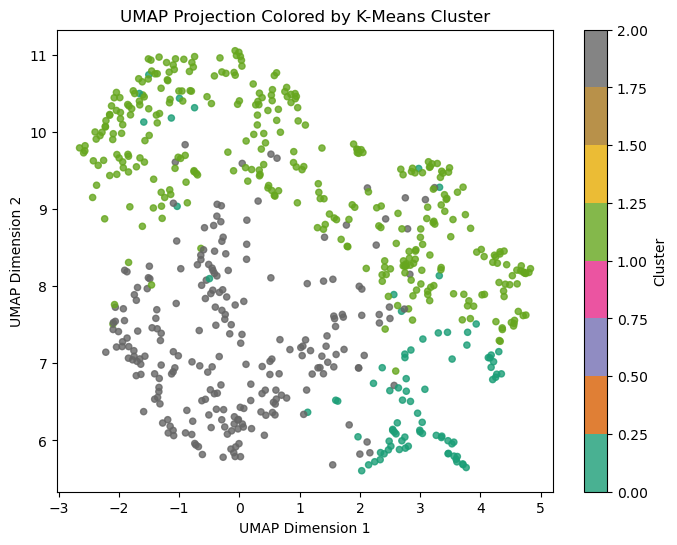

In [47]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
X = df_kmeans[gene_names]

# Step 2: Apply UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)  # This gives a 2D array (n_samples x 2)

# Plot Results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0],         # UMAP dimension 1
    X_umap[:, 1],         # UMAP dimension 2
    c=df_kmeans['cluster'],  # Color by K-means cluster
    cmap='Dark2',
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by K-Means Cluster")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='Cluster')
plt.show()


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

What if we do the same, but only use the biomarker panel of 30 genes?

In [48]:
df_copy = df.copy()

## First we do KMeans Clustering

# Step 1: Select the feature columns (assumed to be numeric)
X = df_copy[panel]

# Step 2: Create and fit the KMeans model
# Let's try clustering into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Step 4: Add the cluster labels back to the dataframe
df_copy['cluster'] = kmeans.labels_

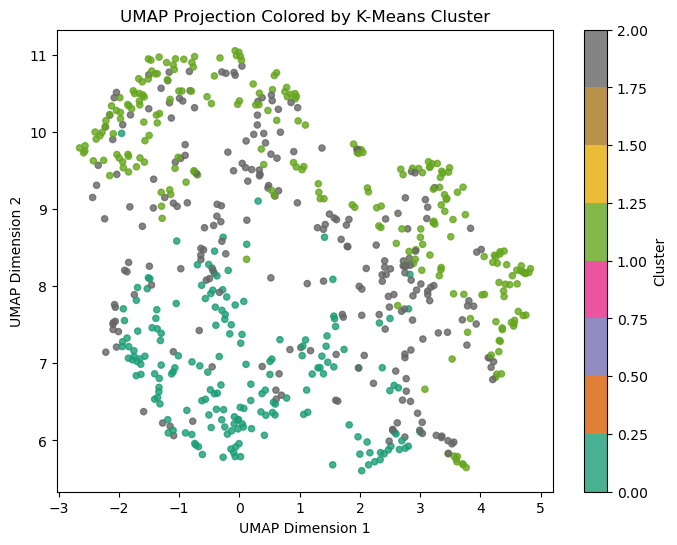

In [49]:
## Then we do the UMAP projection and plot this

# Step 1: Prepare the data
X = df_copy[gene_names]

# Step 2: Apply UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)  # This gives a 2D array (n_samples x 2)

# Plot Results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0],         # UMAP dimension 1
    X_umap[:, 1],         # UMAP dimension 2
    c=df_copy['cluster'],  # Color by K-means cluster
    cmap='Dark2',
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by K-Means Cluster")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## How to Interpret UMAP Plots

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction tool that helps visualize **complex, high-dimensional data** — like gene expression — in **2D space**.

Each **dot** in the UMAP plot represents a **sample** (e.g., a patient or specimen). The position of each dot is based on its **overall gene expression profile**, compressed into two dimensions.

---

### General Interpretation Rules

- **Nearby points** in the plot have **similar gene expression patterns**.
- **Distant points** are more dissimilar.
- If you’ve colored points by cluster (like from K-means), you can visually assess how well the clustering matches the data structure.

---

### Interpreting What You See

- **Tightly packed, well-separated clusters**: This suggests strong underlying structure in the data — distinct biological subgroups may be present.
- **Overlapping or diffuse clusters**: May indicate:
  - The data doesn’t separate cleanly into discrete groups.
  - K-means may have forced an artificial division.
  - More clusters (or fewer) might be appropriate.
  - Additional preprocessing (e.g. filtering genes) could help.

---

### Keep in Mind

- UMAP emphasizes **local relationships** — it tries to keep similar points close together. So:
  - **Relative distances between distant groups** may not be meaningful.
  - **Cluster shapes** can sometimes be distorted.
- UMAP is **unsupervised** — it doesn’t use clinical labels unless you add them later. Patterns may need clinical interpretation to be meaningful.

---

### Clinical Insight Required

UMAP reveals **patterns** — but it doesn’t tell you **why** they exist. To interpret the clusters:
- Check which genes differ across clusters.
- Overlay clinical variables (e.g., diagnosis, age, outcome).
- Use domain knowledge to relate patterns back to biology or patient phenotypes.


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

##  Why Do Distant UMAP Points Have the Same Cluster Color?

When visualizing clustering results on a UMAP plot, you might notice something unexpected:

*Some points that look far apart in the plot are assigned to the same cluster.*

This isn't necessarily an error — and here's why:

---

### UMAP Shows Local Relationships, Not Global Ones

UMAP is a **dimensionality reduction technique** that tries to preserve the **local structure** of your data:
- Samples that are *similar* in many genes will appear *close together*.
- But samples that are *dissimilar* might still appear *somewhat close*, or *very far*, depending on how UMAP compresses the high-dimensional data.

**UMAP does not preserve actual distances** between distant points — it's optimized for **visual clarity**, not measurement accuracy.

---

###  K-Means Uses All the Original Data

K-means clustering doesn’t know anything about the 2D UMAP plot. It looks at **all genes** in the full data and groups samples based on overall similarity across those features.

So:

Two samples might look far apart in UMAP, but **still be similar in the original high-dimensional space** — and K-means will group them together.

---

### What This Means for Interpretation

- If a cluster appears **scattered across the UMAP**, it might still make biological sense — check which genes or clinical variables unite those samples.
- If a cluster looks **visually compact and separated**, that’s stronger evidence it represents a distinct group.
- If UMAP and K-means disagree, it’s a **clue to explore further**, not a mistake.

---

### Clinical Analogy

Think of UMAP and clustering as two diagnostic tests:
- One gives a **broad visual overview** (UMAP).
- The other does **detailed quantitative grouping** (K-means).

When they agree — great! When they don't — that's your signal to dig deeper into what's driving the differences.

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

So far, we have only used 3 clusters in KMeans - what if we use a different number?  
Remember, for KMeans, you *pick* the number of clusters to use! The algorithm doesn't tell you what the "best" number of clusters to use is.

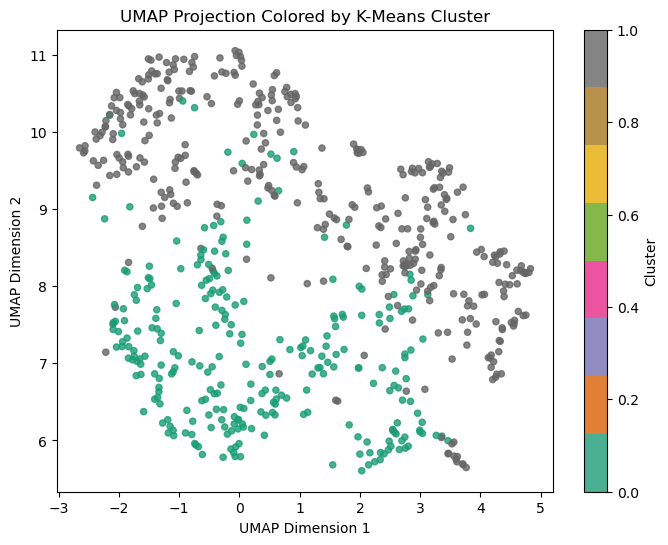

In [50]:
df_copy = df.copy()

## First we do KMeans Clustering

# Step 1: Select the feature columns (assumed to be numeric)
X = df_copy[panel]

# Step 2: Create and fit the KMeans model
# Let's try clustering into 3 groups
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Step 4: Add the cluster labels back to the dataframe
df_copy['cluster'] = kmeans.labels_

## Then we do the UMAP projection and plot this

# Step 1: Prepare the data
X = df_copy[gene_names]

# Step 2: Apply UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)  # This gives a 2D array (n_samples x 2)

# Plot Results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0],         # UMAP dimension 1
    X_umap[:, 1],         # UMAP dimension 2
    c=df_copy['cluster'],  # Color by K-means cluster
    cmap='Dark2',
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by K-Means Cluster")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

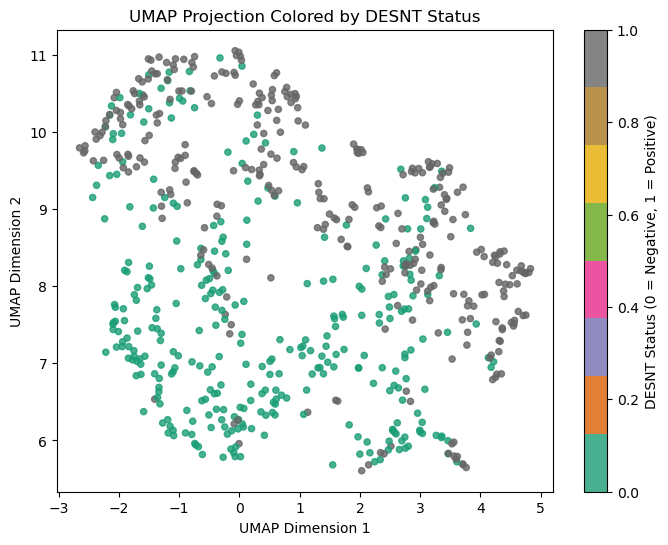

In [51]:
# Convert DESNT_Status to numeric values: Positive=1, Negative=0
color_vals = df['DESNT_Status'].map({'Negative': 0, 'Positive': 1})

# Now plot with those numeric values
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=color_vals,
    cmap='Dark2',   # good for binary values
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by DESNT Status")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='DESNT Status (0 = Negative, 1 = Positive)')
plt.show()

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

So you can see actually the clustering is picking out the DESNT status pretty accurately!  
This is what we mean about needing to interpret the result of your clustering!

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## <u> UMAP Parameters </u>. 

The UMAP algorithm has two parameters that you can use to control its behaviour:
#### `n_neighbors`
- Think of this as the **number of nearest data points** each point considers when learning the shape of the data.
- **Low values** (e.g. 5) make UMAP focus more on **local structure**, helping to separate small clusters.
- **High values** (e.g. 50) make it capture more **global structure**, showing broader patterns.

#### `min_dist`
- Controls how **tightly UMAP packs the points together** in the final 2D (or 3D) plot.
- **Low values** (e.g. 0.01) make clusters look tighter and more distinct.
- **High values** (e.g. 0.5) allow more space between points, leading to a more spread-out visualization.
  
UMAP is primarily a tool for visualisation; not really for discovery. The fact that varying `n_neighbors` and `min_dist` will change the UMAP plot is part of this! There is not a single "correct" UMAP.  
  
In this next cell, you can pick different min_dist and n_neighbors parameters and see how it changes the UMAP plot

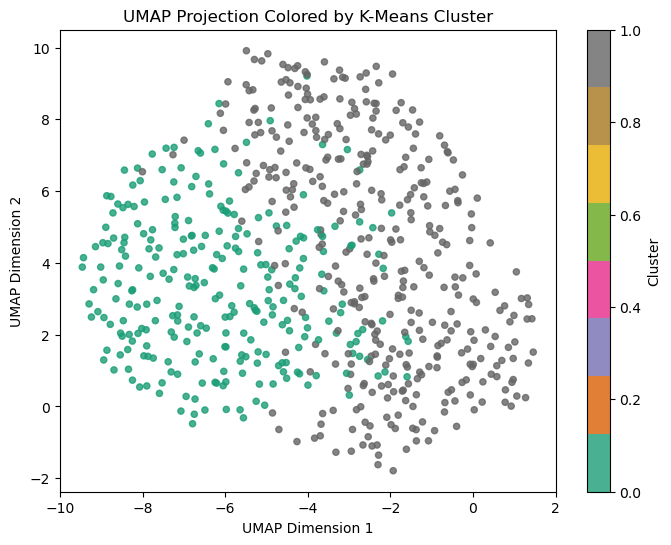

In [52]:
min_dist = 1
n_neighbors = 20

reducer = umap.UMAP(random_state=42, min_dist=min_dist, n_neighbors=n_neighbors)
X_umap = reducer.fit_transform(X)  # This gives a 2D array (n_samples x 2)

# Plot Results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0],         # UMAP dimension 1
    X_umap[:, 1],         # UMAP dimension 2
    c=df_copy['cluster'],  # Color by K-means cluster
    cmap='Dark2',
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by K-Means Cluster")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## <u> Hierarchical Clustering </u>.  
  
Another important clustering method that you will see commonly is hierarchical clustering. It groups data points based on similarity. Unlike K-Means, hierarchical clustering does not require you to specify the initial number of clusters 

--- 

###  How It Works (Briefly)

1. Each sample starts as its own cluster.
2. The algorithm **repeatedly merges the closest pairs of clusters**.
3. This continues until all samples are grouped into a single large cluster.
4. You can then **“cut” the dendrogram** at any level to define meaningful groups.

---

### Why Use Hierarchical Clustering?

- You don’t need to choose the number of clusters ahead of time.
- The **dendrogram** can reveal nested subgroups and relationships.
- It's often used in heatmaps to cluster both samples and genes.

---

### Clinical Example

Hierarchical clustering can help:
- Group patients based on gene expression profiles.
- Identify subtypes of disease.
- Find co-expressed gene modules (genes that behave similarly across patients).

---


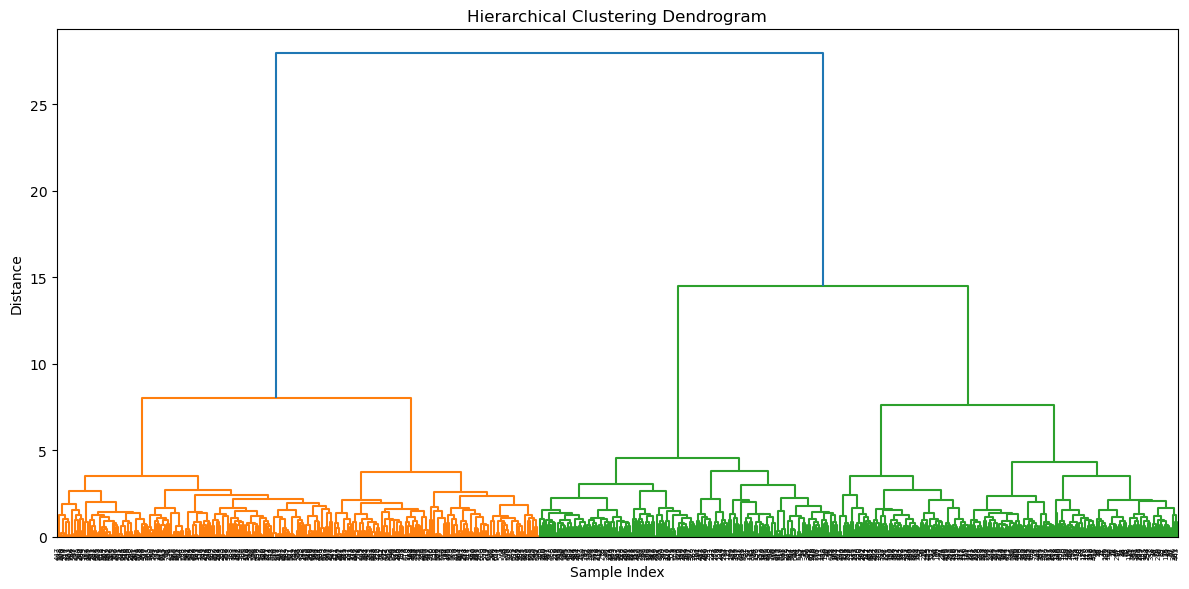

In [53]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 1: Extract and scale the gene expression data
X = df_copy[panel]

# Step 2: Perform hierarchical clustering
# 'ward' minimizes the variance within clusters
Z = linkage(X, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df_copy.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [54]:
n_clusters = 2
cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

# Step 4: Add cluster labels to the dataframe
df_copy['hierarchical_cluster'] = cluster_labels

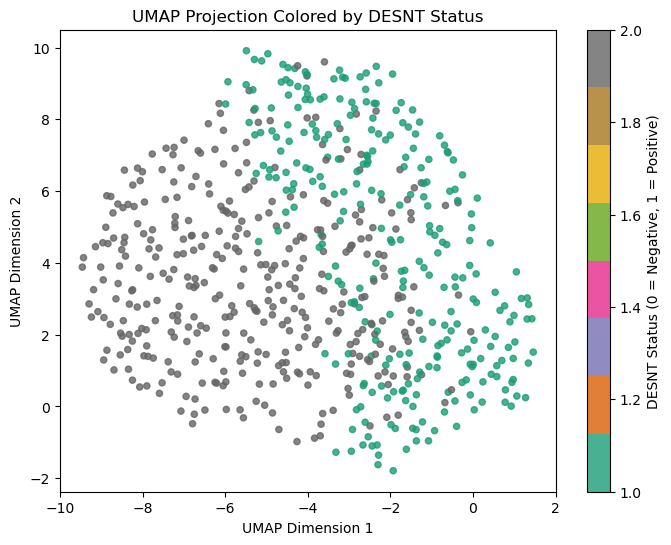

In [55]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=df_copy["hierarchical_cluster"],
    cmap='Dark2',   # good for binary values
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by DESNT Status")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='DESNT Status (0 = Negative, 1 = Positive)')
plt.show()

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Summary. 

In this notebook, we talked about unsupervised machine learning: specifically clustering. This is a technique widely used across biology to help interpret high dimensional data and find groupings in the data that correspond to real-world phenotypes.  
  
There are many different types of clustering, but we have only shown the two most important ones: KMeans and Hierarchical Clustering. There is far more information about clustering out there, for more information take a look at `https://scikit-learn.org/stable/modules/clustering.html`.  

A particular challenge with biomedical data is its high dimensionality. There are usually thousands of features, and human beings cannot visualise in that many dimensions. Therefore, the technique of dimensionality reduction is important to render data down to its key components. The most commonly used in cancer research is uniform manifold projection (UMAP), which is what we discussed in this notebook. Again, there are many more examples: `https://www.geeksforgeeks.org/machine-learning/dimensionality-reduction/`.  

A challenge with **unsupervised machine learning** is that our analysis is often *exploratory*. We do not exactly know what trends we are trying to predict: the trends are what we are trying to find. This makes it far more iterative and experimental than the supervised machine learning we looked at in the rest of course. 